# Web Scraping Phones 

Importing required packages

In [36]:
import seaborn as sns
from bs4 import BeautifulSoup as soup
from selenium import webdriver 
import time
import pandas as pd
from re import sub
import re
from decimal import Decimal
import matplotlib.pyplot as plt
import numpy as np

Setting up Selenium to load the Webpage

In [4]:
driver = webdriver.Chrome(executable_path="/Users/vyasm/Downloads/chromedriver/chromedriver.exe")

#loads webpage by scrolling down every 5 seconds
driver.get('https://www.fido.ca/nac/#/choose-phone')
#driver.find_element_by_css_selector(".ute-btn-primary.tab-focus").click() 
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  
time.sleep(5)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  
time.sleep(5)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  
time.sleep(5)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  
time.sleep(5)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  
time.sleep(5)

#parses html of the page
page = soup(driver.page_source,'html.parser')

Web scraping name, largest plan price, no term price and best plans for each phone

In [5]:
#creates an array of all containers which contain information about every phone
container = page.find_all("div",{"class":"phone-margin setPadding device-catalog-breakpoints col-xs-12 col-sm-4 ng-scope"})

names = []
cheaprice = []
actualprice = []
plan = []

#creates an array for the name, term price, no term price and plan for each smartphone
for n in range(0,len(container)):
    
    names.append(container[n].h3.text)
    cheaprice_to_add=Decimal((sub(r'[^\d.]', '', container[n].find_all("ins")[0].text)))
    cheaprice.append(cheaprice_to_add)
    actualprice_to_add=Decimal((sub(r'[^\d.]', '', container[n].find_all("ins")[1].text)))
    actualprice.append(actualprice_to_add)         
    plan.append(container[n].find_all("span",{"class":"ng-binding ng-scope"})[0].text)

Placing data into Dataframe for Analysis <br>
Cleaning Data by converting all prices to an integer data type <br>
Creating smaller dataframes for each phone company <br>
The ZTE Z223 phone is dropped from the dataframe since it is the only flip phone sold.

In [97]:
#Creates dataframe
df = pd.DataFrame({'Plan Price':cheaprice,'No Term Price':actualprice,'Plan':plan}, index = names )

#Converts values to integers
for i in range(0,26):
    df['No Term Price'][i] = int(df['No Term Price'][i])
    df['Plan Price'][i] = int(df['Plan Price'][i])
    
#Drops one data point    
df.drop('ZTE Z223',inplace=True)

#Sorts by the No Term Price of Phones
df.sort_values('No Term Price',inplace=True)

#Creates smaller dataframes for each phone brand
lgdf = df.loc[df.index.str.contains("LG")]
samsungdf = df.loc[df.index.str.contains("Samsung")]
iphonedf = df.loc[df.index.str.contains("iPhone")]
huaweidf = df.loc[df.index.str.contains("Huawei")]
googledf = df.loc[df.index.str.contains("Google")]

In [103]:
df



,No Term Price,Plan,Plan Price
Huawei GR5,100,Small,0
LG K4 (2017),120,Small,0
Samsung Galaxy J3 Prime,250,Small,0
LG X power 2,299,Small,0
Huawei P10 lite,349,Medium,0
LG Q6,449,Medium,0
iPhone SE,489,Medium,0
iPhone 6,499,Medium,0
Samsung Galaxy A5,500,Medium,0
iPhone 6s,629,Large,129


## Scatter Plot of no term price of all smartphones 

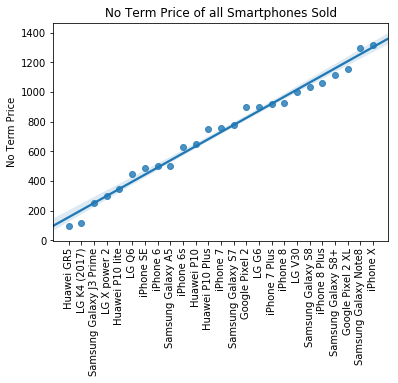

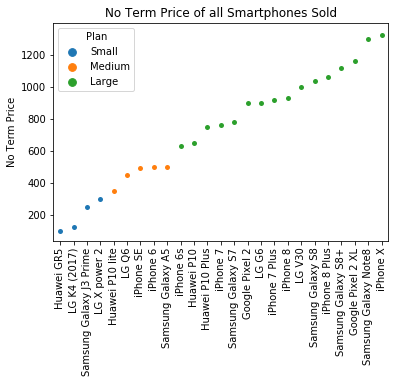

In [94]:

#Regression Plot
x=np.array(list(range(25)))
ax = sns.regplot(x,y=df['No Term Price'])
ax.set_title("No Term Price of all Smartphones Sold")
plt.xticks(x,df.index,rotation = 90);
plt.show()

#Scatter Plot
ax2 = sns.stripplot(x=df.index,y=df['No Term Price'],hue=df['Plan'])
ax2.set_title("No Term Price of all Smartphones Sold")
plt.xticks(rotation = 90)
plt.show()


The iPhone X had the highest price with \$1319 and Huawei GR5 had the lowest price with only \$100. <br>The price of the phones also closely followed a linear model. <br> About 64% of phones are offered with a Large Plan, 20 % with a Medium Plan and 16% with a Small plan. 

## Plotting a scatter plot of every smartphone sold by every phone brand

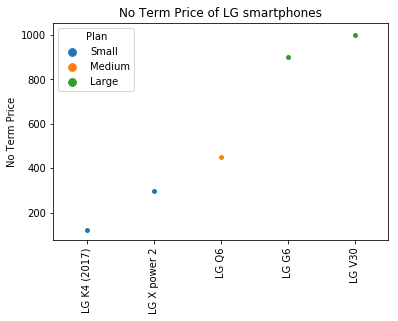

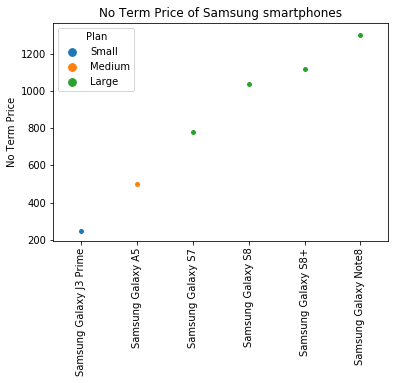

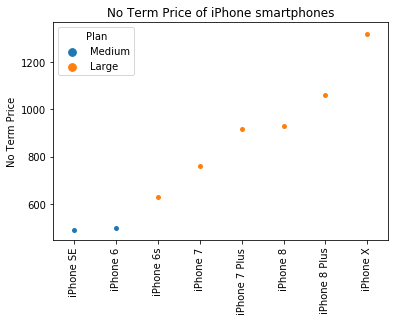

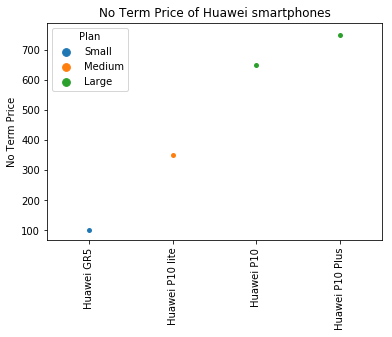

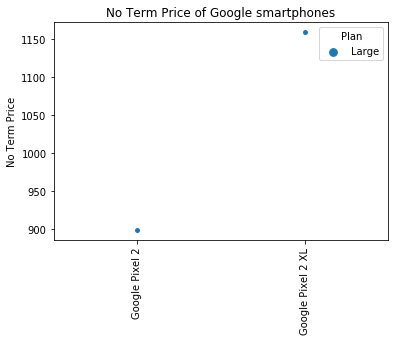

In [120]:
ax2 = sns.stripplot(x=lgdf.index,y=lgdf['No Term Price'],hue=lgdf['Plan'])
ax2.set_title("No Term Price of LG smartphones")
plt.xticks(rotation = 90)
plt.show()

ax2 = sns.stripplot(x=samsungdf.index,y=samsungdf['No Term Price'],hue=samsungdf['Plan'])
ax2.set_title("No Term Price of Samsung smartphones")
plt.xticks(rotation = 90)
plt.show()

ax3 = sns.stripplot(x=iphonedf.index,y=iphonedf['No Term Price'],hue=iphonedf['Plan'])
ax3.set_title("No Term Price of iPhone smartphones")
plt.xticks(rotation = 90)
plt.show()

ax4 = sns.stripplot(x=huaweidf.index,y=huaweidf['No Term Price'],hue=huaweidf['Plan'])
ax4.set_title("No Term Price of Huawei smartphones")
plt.xticks(rotation = 90)
plt.show()

ax5 = sns.stripplot(x=googledf.index,y=googledf['No Term Price'],hue=googledf['Plan'])
ax5.set_title("No Term Price of Google smartphones")
plt.xticks(rotation = 90)
plt.show()




The iPhone and Samsung phones are the most popular with 6 Samsung phones being sold and 8 iPhones being sold. <br> Samsung, Huawei and LG offer offer a variety of smartphones ranging from budget to flagship smartphones on all different plans.Google offers only 2 flagship smartphones.

## Plotting the Term Price of all Smartphones

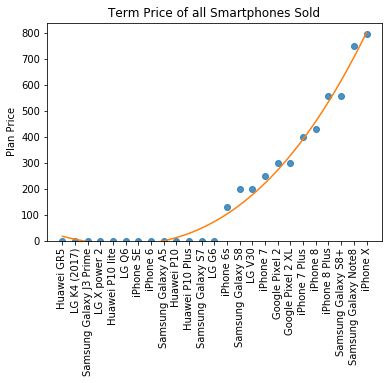

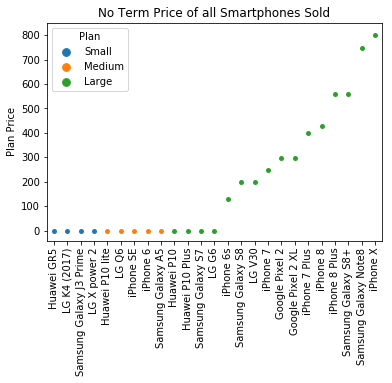

In [117]:
df.sort_values('Plan Price',inplace = True)
x=np.array(list(range(25)))

#Creates Polynomial Model
z = np.polyfit(x,df['Plan Price'],3)
f = np.poly1d(z)

#Calculates new x and y values
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

ax = sns.regplot(x,y=df['Plan Price'],fit_reg = False)
ax.set_title("Term Price of all Smartphones Sold")
plt.xticks(x,df.index,rotation = 90);
plt.ylim(ymin = 0)
plt.plot(x_new,y_new)
plt.show()


ax2 = sns.stripplot(x=df.index,y=df['Plan Price'],hue=df['Plan'])
ax2.set_title("No Term Price of all Smartphones Sold")
plt.xticks(rotation = 90)
plt.show()

All small and medium plan phones are offered at \$0. The graph follows a cubic model closely.
